# Natural Language Processing

## Import statements

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load the data


In [2]:

sms_data = pd.read_csv('spam.csv', encoding='latin-1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Remove the unwanted columns

cols_to_delete = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

for col in cols_to_delete:
    sms_data.drop(col, axis= 1, inplace=True)
    
# take a look at data
sms_data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Add column names

col_names = ['target','sms']
sms_data.columns = col_names


In [5]:
sms_data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms_data.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

## Text Cleaning

In [7]:
# Remove punctuation
import string

def removePunc(token):
    return token.translate(str.maketrans('', '', string.punctuation))

In [8]:
print(sms_data.head(2))
sms_data['sms'] = sms_data['sms'].apply(removePunc)
print(sms_data.head(2))


  target                                                sms
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
  target                                                sms
0    ham  Go until jurong point crazy Available only in ...
1    ham                            Ok lar Joking wif u oni


In [9]:
# Remove stop words
from nltk.corpus import stopwords

def removeStop(token):
    sub_list =  [word for word in token.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(sub_list)

In [10]:
print(sms_data.head(2))
print("------------------------------------------------")
sms_data['sms'] = sms_data['sms'].apply(removeStop)
print(sms_data.head(2))

  target                                                sms
0    ham  Go until jurong point crazy Available only in ...
1    ham                            Ok lar Joking wif u oni
------------------------------------------------
  target                                                sms
0    ham  Go jurong point crazy Available bugis n great ...
1    ham                            Ok lar Joking wif u oni


In [11]:
# Apply stemming

from nltk.stem import SnowballStemmer

def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [12]:
print(sms_data.head(2))
print("------------------------------------------------")
sms_data['sms'] = sms_data['sms'].apply(stemmer)
print(sms_data.head(2))

  target                                                sms
0    ham  Go jurong point crazy Available bugis n great ...
1    ham                            Ok lar Joking wif u oni
------------------------------------------------
  target                                                sms
0    ham  go jurong point crazi avail bugi n great world...
1    ham                             ok lar joke wif u oni 


In [13]:
predictors = sms_data['sms']
target = sms_data['target']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer("english")
tf_idf = vectorizer.fit_transform(predictors)

In [15]:
print(tf_idf.shape)

(5572, 8037)


In [16]:
print(tf_idf[0])


  (0, 3289)	0.140812183088
  (0, 4063)	0.350111280384
  (0, 5539)	0.239063384373
  (0, 2223)	0.271137086094
  (0, 1327)	0.266231312333
  (0, 1726)	0.295775424463
  (0, 3380)	0.194495550113
  (0, 7776)	0.237927216852
  (0, 4204)	0.295775424463
  (0, 1724)	0.334219061305
  (0, 2006)	0.295775424463
  (0, 3342)	0.164475816719
  (0, 1138)	0.350111280384
  (0, 7574)	0.194495550113


In [17]:
vectorizer.idf_[1000]

8.9325416070095898

In [18]:
vectorizer.get_feature_names()[1000]

'administr'

In [19]:
print(tf_idf[1000])

  (0, 949)	0.421713258406
  (0, 6884)	0.505503202971
  (0, 5019)	0.587963352273
  (0, 3517)	0.470025037475


In [20]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_idf, target, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [22]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [23]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [24]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [25]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [26]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, [accuracy_score(y_test,pred)]))

In [27]:
pred_scores

[('SVC', [0.97444263186514413]),
 ('KN', [0.92822185970636217]),
 ('NB', [0.97824904839586735]),
 ('DT', [0.95758564437194127]),
 ('LR', [0.94344752582925506]),
 ('RF', [0.97389885807504073]),
 ('AdaBoost', [0.96411092985318103]),
 ('BgC', [0.96519847743338771]),
 ('ETC', [0.97335508428493744])]

In [28]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
SVC,0.974443
KN,0.928222
NB,0.978249
DT,0.957586
LR,0.943448
RF,0.973899
AdaBoost,0.964111
BgC,0.965198
ETC,0.973355


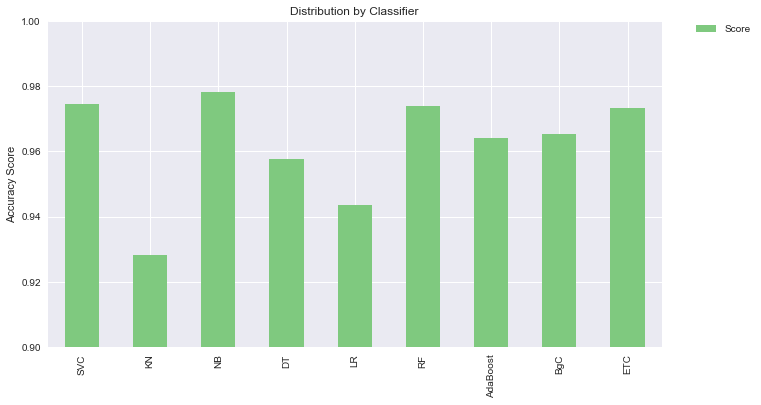

In [29]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



In [31]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 500, 1000, 5000),
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}


In [32]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [33]:
grid_search.fit(predictors,target)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   47.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'tfidf__max_df': (0.5, 0.75, 1.0), 'tfidf__max_features': (None, 500, 1000, 5000), 'tfidf__ngram_range': ((1, 1), (1, 2)), 'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [34]:
grid_search.best_score_

0.98151471643933952

In [35]:
grid_search.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
 ...ue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

##  https://medium.com/towards-data-science/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a